### 1、数据分析背景

1.1 背景

    从多维度对多个超市2018年六月至七月的销售数据进行分析，总结销售规律，为来年销售计划做准备，指导之后的产品销售。
    
1.2 理解数据

（1） Basket-2018-06-01-2018-07-05数据集

SHOP_DATETIME    日期

STORE_CODE       超市编码

POS_NO           POS机编码

BASK_CODE        购物篮编码

BASK_SPEND       购物篮包含的货物总价格

（2） item-2018-06-01-2018-07-05数据集

SDATE            日期

STORE_CODE       超市编码

POSID            POS机ID

BASK_CODE        购物篮编码

PROD_CODE        商品编码

ITEM_QUANTITY    商品数量

ITEM_SPEND       商品价格

NORMAL_PRICE     日常价格

DISCOUNT_TYPE    折扣类型

DISCOUNT_AMOUNT  折扣数量

### 2、分析思路

这次作业尝试着对一份零售商品数据进行分析，期望通过此次分析能达到如下目的：

·对数据进行预处理，查看是否有缺失值、删除异常数据等

·对数据进行总体分析

·对各维度进行分析

（1）对超市进行分析

    1）找出购买商品数量前十的超市
    
    2）找出购买商品数量后十的超市
    
    3）找出交易额前十的超市
    
    4）找出交易额后十的超市
    
    5）销量和销售额都排名前10的超市
    
    6）销量和销售额都排名后10的超市
    
    7）对以上结果进行可视化
    
（2）对商品进行分析

    1）找出销量前十的商品
    
    2）找出销量前十的商品
    
    3）找出交易额前十的商品
    
    4）找出交易额前十的商品
    
    5）销量和销售额都排名前10的商品
    
    6）销量和销售额都排名前10的商品
    
    7）对以上结果进行可视化
    
（3）对价格进行分析

    1）找出哪些价格区间的商品销量高
    
    2）找出哪些价格区间的商品销售额高
    
    3）对以上结果进行可视化
    
（4）对时间进行分析

    1）找出超市在哪段时间销量高
    
    2）找出超市在哪段时间交易额高
    
    3）找到每周中哪一天是客流量的高峰期，进而合理分配人力资源
    
    4）对以上结果进行可视化
    
（5）对折扣类型进行分析

    1）找出哪个折扣类型力度最大
    
    2）找出哪个折扣类型销售额最高
    
    3）找出哪个折扣类型最能吸引消费者
    
    4）对以上结果进行可视化
    
（6）对POS机进行分析

    对每个超市的POS机进行分析，可以找出每个超市哪个出口更方便消费者




### 3、数据预处理
### 3.1 数据整合

### 3.1.1 加载相关库和数据集

使用的库主要有：pandas、numpy、matplotlib、seaborn


In [6]:
# 加载数据分析需要使用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#pd.set_option('display.max_rows',None)#设置行不限制数量
plt.rcParams['font.sans-serif'] = ['SimHei']
warnings.filterwarnings('ignore')



使用的数据集：item-2018-06-01-2018-07-05

In [7]:

# 加载item数据集，使用'ISO-8859-1'编码方式
df = pd.read_csv('/Users/zhy/Desktop/item-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1') 
df.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


使用的数据集：Basket-2018-06-01-2018-07-05

In [8]:
# 加载Basket数据集，使用'ISO-8859-1'编码方式
df2 = pd.read_csv('/Users/zhy/Desktop/Basket-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1') 
df2.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


### 3.1.2 数据概览

In [9]:
#首先看一下数据集大小（行列信息）
df.shape

(1048575, 10)

In [10]:
#首先看一下数据集大小（行列信息）
df2.shape

(571552, 5)

In [11]:
#看一下数据的分布概况
df.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.016397e+00,1.611352e+05,1.147050e+05,1.490041e+00,1.363701e+01,1.483649e+01,-1.960952e+00
std,2.478932e+00,8.605571e+04,8.133691e+04,8.255032e+00,1.089738e+02,2.504771e+01,6.330616e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-1.200000e+02,-8.700000e+02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.477400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695360e+05,1.244580e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.177830e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,6.960000e+02


In [12]:
#看一下数据的分布概况
df2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


### 3.2 数据清洗

### 3.2.1 数据类型处理

In [13]:
#查看一下每一列的数据类型
df.dtypes
#可以看到：SDATE、STORE_CODE、DISCOUNT_TYPE 是object类型，其他列是数值型，这些列都不需要进行数据类型处理。日期应为datetime类型，我们需要对其进行处理。

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [14]:
df["SDATE"] = pd.to_datetime(df["SDATE"]) 
df["SDATE"].sample(5)

968249   2018-06-16
944095   2018-06-18
986006   2018-06-22
180495   2018-06-03
35355    2018-06-01
Name: SDATE, dtype: datetime64[ns]

In [15]:
#查看一下每一列的数据类型
df2.dtypes
#可以看到：SHOP_DATETIME、STORE_CODE是object类型，其他列是数值型，这些列都不需要进行数据类型处理。日期应为datetime类型，我们需要对其进行处理。

SHOP_DATETIME     object
STORE_CODE        object
POS_NO             int64
BASK_CODE          int64
BASK_SPEND       float64
dtype: object

In [16]:
df2["SHOP_DATETIME"] = pd.to_datetime(df2["SHOP_DATETIME"]) 
df2["SHOP_DATETIME"].sample(5)

456146   2018-06-10
274010   2018-06-27
212193   2018-07-05
115234   2018-06-23
223344   2018-06-06
Name: SHOP_DATETIME, dtype: datetime64[ns]

3.2.3 缺失值处理

In [17]:
#查看一下各列的缺失值情况
df.isnull().sum(axis=0)#通过观察发现，没有缺失值

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE          0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [18]:
#查看一下各列的缺失值情况
df2.isnull().sum(axis=0)#通过观察发现，没有缺失值

SHOP_DATETIME    0
STORE_CODE       0
POS_NO           0
BASK_CODE        0
BASK_SPEND       0
dtype: int64

### 3.2.4 异常值处理

查看数据是否存在异常值

In [19]:
df.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.016397e+00,1.611352e+05,1.147050e+05,1.490041e+00,1.363701e+01,1.483649e+01,-1.960952e+00
std,2.478932e+00,8.605571e+04,8.133691e+04,8.255032e+00,1.089738e+02,2.504771e+01,6.330616e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-1.200000e+02,-8.700000e+02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.477400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695360e+05,1.244580e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.177830e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,6.960000e+02


In [20]:
#从最小值中看出ITEM_QUANTITY列中有负数，说明有异常值，给予删除
df_new=df[df['ITEM_QUANTITY']>0]

In [21]:
df_new.describe()
#可以看出异常值被删除

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06
mean,3.014803e+00,1.611660e+05,1.146857e+05,1.495503e+00,1.370416e+01,1.481427e+01,-1.971159e+00
std,2.473808e+00,8.604381e+04,8.133262e+04,8.253395e+00,1.089854e+02,2.498871e+01,6.333295e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,1.000000e-02,0.000000e+00,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.481400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695760e+05,1.244480e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.178000e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,2.264000e+02


In [22]:
df_new.shape
#原数据为1048575条，现数据为1047389条，删除了1186条

(1047389, 10)

In [23]:
df2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [24]:
#从最小值中看出BASK_SPEND列中有负数，说明有异常值，给予删除
df_new2=df2[df2['BASK_SPEND']>0]

In [25]:
df_new2.describe()
#可以看出异常值被删除

,POS_NO,BASK_CODE,BASK_SPEND
count,569797.000000,569797.000000,569797.000000
mean,2.994330,167572.136898,39.583197
std,2.502507,87224.915886,196.158166
min,1.000000,961.000000,0.010000
25%,1.000000,90673.000000,9.000000
50%,2.000000,177692.000000,20.000000
75%,3.000000,238933.000000,44.800000
max,20.000000,323914.000000,79920.000000


In [26]:
df_new2.shape
#原数据为571552条，现数据为569797条，删除了1755条

(569797, 5)

### 4、数据分析
### 4.1 总体情况分析


In [27]:
days_num2 = len(df_new2['SHOP_DATETIME'].unique())
stores_num2 = len(df_new2['STORE_CODE'].unique())
basks_num2 = len(df_new2['BASK_CODE'].unique())
prods_num2 = len(df_new2['POS_NO'].unique())

print('天数总数为: %d' %days_num2)
print('超市总数为: %d' %stores_num2)
print('购物篮总数为: %d' %basks_num2)
print('POS机总数为: %d' %prods_num2)


天数总数为: 35
超市总数为: 24
购物篮总数为: 280816
POS机总数为: 13


In [28]:
days_num = len(df_new['SDATE'].unique())
stores_num = len(df_new['STORE_CODE'].unique())
poss_num = len(df_new['POSID'].unique())
basks_num = len(df_new['BASK_CODE'].unique())
prods_num = len(df_new['PROD_CODE'].unique())
discs_num = len(df_new['DISCOUNT_TYPE'].unique())
print('天数总数为: %d' %days_num)
print('超市总数为: %d' %stores_num)
print('pos机总数为: %d' %poss_num)
print('购物篮总数为: %d' %basks_num)
print('商品总数为: %d' %prods_num)
print('折扣种类为: %d' %discs_num)

天数总数为: 23
超市总数为: 24
pos机总数为: 13
购物篮总数为: 222126
商品总数为: 17424
折扣种类为: 9


### 4.2 各维度分析

分析数据可以从两方面开始考虑，一个是维度，一个是指标，维度可以看做x轴，指标可以看成是y轴，同一个维度可以分析多个指标，同一个维度也可以做降维升维

### 4.2.1超市分析

In [47]:
storeId_count2 = df_new2.groupby('STORE_CODE').count()['BASK_CODE'].sort_values(ascending=False)
print(storeId_count2.head(10))
#人流前10名的超市



STORE_CODE
A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
Name: BASK_CODE, dtype: int64


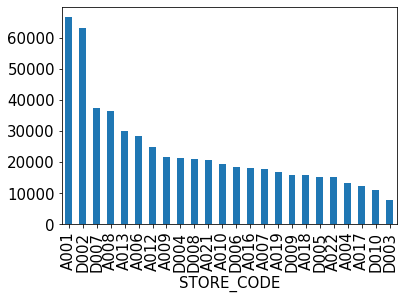

In [49]:

storeId_count2.plot(kind='bar')

In [31]:
print(storeId_count2.tail(10))
#人流后10名的超市

STORE_CODE
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: BASK_CODE, dtype: int64


In [43]:
#再看一下销售额前十名的超市
storeId_amount2 = df_new2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending=False)
print(storeId_amount2.head(10))
#销售额前10名的超市


   STORE_CODE    BASK_SPEND
0        A001  3.478348e+06
15       D002  3.177385e+06
20       D007  1.382203e+06
4        A008  1.324641e+06
8        A013  1.126551e+06
2        A006  9.439233e+05
7        A012  8.546610e+05
17       D004  8.153388e+05
19       D006  8.144365e+05
5        A009  8.052129e+05


<Figure size 576x576 with 0 Axes>

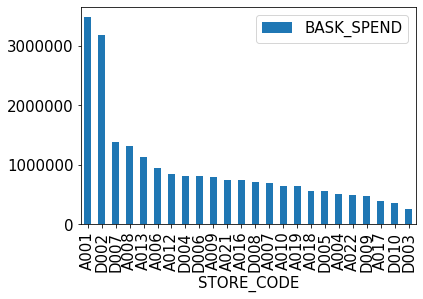

In [44]:
plt.figure(figsize=(8, 8))
storeId_amount2.set_index('STORE_CODE',inplace=True)
storeId_amount2.plot(kind='bar')

In [115]:
print(storeId_amount2.tail(10))
#销售额后10名的超市
#可以看出，前十名和后十的超市销售额相差很大

STORE_CODE
A010    653372.90
A019    650797.35
A018    563395.09
D005    561386.80
A004    515663.06
A022    488646.16
D009    473629.18
A017    401767.00
D010    364347.25
D003    253080.72
Name: BASK_SPEND, dtype: float64


In [116]:
#人流和销售额都前十名的超市
problem_storeIds2 = storeId_amount2.head(10).index.intersection(storeId_count2.head(10).index)
print(len(problem_storeIds2))
print(problem_storeIds2.tolist())

9
['A001', 'D002', 'D007', 'A008', 'A013', 'A006', 'A012', 'D004', 'A009']


In [117]:
storeId_count = df_new.groupby('STORE_CODE').count()['PROD_CODE'].sort_values(ascending=False)
print(storeId_count.head(10))
#销量前10名的超市

STORE_CODE
D002    142433
A001    122641
A008     69861
D007     69800
A013     50781
A006     49792
D004     44387
A012     41336
D006     39518
A021     36025
Name: PROD_CODE, dtype: int64


In [118]:
print(storeId_count.tail(10))
#销量后10名的超市
#可以看出，前两名和后边的超市销量相差很大

STORE_CODE
A010    31503
A019    30549
A004    29420
D005    29063
A018    26636
D009    25149
A022    24537
D010    20055
A017    17701
D003    12699
Name: PROD_CODE, dtype: int64


In [119]:
#再看一下销售额前十名的超市
storeId_amount = df_new.groupby('STORE_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(storeId_amount.head(10))
#销售额前10名的超市

STORE_CODE
A001    2.413546e+06
D002    1.934742e+06
A008    9.145735e+05
D007    8.436205e+05
A013    7.538393e+05
A006    6.378124e+05
A012    5.712609e+05
A007    5.008311e+05
A009    4.959406e+05
D004    4.923083e+05
Name: ITEM_SPEND, dtype: float64


In [120]:
print(storeId_amount.tail(10))
#销售额后10名的超市

STORE_CODE
D008    416171.37
A019    410409.35
A004    344320.75
D005    329099.65
A018    325387.19
A022    282829.62
D009    274901.19
A017    254315.82
D010    219562.27
D003    148591.63
Name: ITEM_SPEND, dtype: float64


根据以上的结果，对销售额/销量排名前十名的超市可以采取增加库存，增加推广成本等措施来进一步提升销量。而对于销售额/销量排名后几名的超市，则需要进行调研分析，学习前两名超市的运营模式、策略，确定超市销售额低下的原因，采取一定措施进行超市销量的提升，也可以考虑适当减少这些商品的库存，以减少损失。

看下销量和销售额都排名前10的超市：

In [121]:
problem_storeIds = storeId_amount.head(10).index.intersection(storeId_count.head(10).index)
print(len(problem_storeIds))
print(problem_storeIds.tolist())

8
['A001', 'D002', 'A008', 'D007', 'A013', 'A006', 'A012', 'D004']


一共有8个超市销量和销售额表现优秀， 因此，我们可以针对这些超市开展更多的优惠活动或者线下活动，进一步提升销量。

接下来对超市销量和销售额进行可视化，更清楚地看出哪一家超市更生意更好

In [208]:

sales_data = df_new[['STORE_CODE','ITEM_QUANTITY','ITEM_SPEND']]
sales_store = sales_data.groupby(['STORE_CODE']).sum()
sales_store.style.background_gradient()

,ITEM_QUANTITY,ITEM_SPEND
STORE_CODE,,
A001,199642,2.41355e+06
A004,40970,344321
A006,72761.1,637812
A007,52482,500831
A008,103598,914573
A009,53585,495941
A010,52366.4,438560
A012,63911.5,571261
A013,81636.9,753839


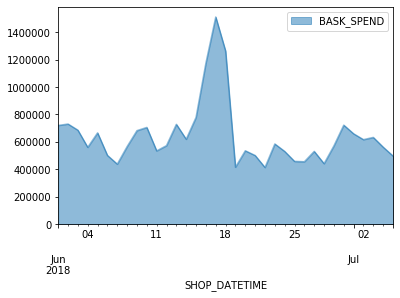

In [235]:
#用面积图可视化
sales_store.plot.area(stacked=False)

In [233]:
sales_data2 = df_new2[['STORE_CODE','BASK_SPEND']]
sales_store2 = sales_data2.groupby(['STORE_CODE']).sum()
sales_store2.style.background_gradient()

,BASK_SPEND
STORE_CODE,
A001,3.47835e+06
A004,515663
A006,943923
A007,693885
A008,1.32464e+06
A009,805213
A010,653373
A012,854661
A013,1.12655e+06


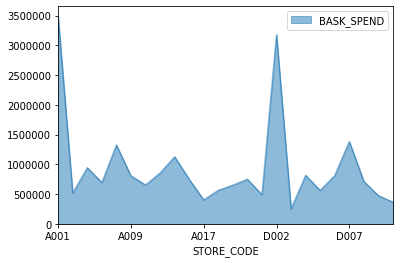

In [234]:
#用面积图可视化
sales_store2.plot.area(stacked=False)

### 4.2.2 商品分析

In [122]:
productId_count1 = df_new.groupby('PROD_CODE').count()['ITEM_QUANTITY'].sort_values(ascending=False)
print(productId_count1.head(10))
#销量前10名的商品

PROD_CODE
194690    6817
205540    6665
21835     6590
178462    5434
72811     5105
197532    4217
205437    4097
75283     4022
109584    3936
219118    3895
Name: ITEM_QUANTITY, dtype: int64


In [123]:
print(productId_count1.tail(10))
#销量后10名的商品
#可以看出，前十名和后十名的商品销量相差很大

PROD_CODE
14892     1
210299    1
184111    1
82071     1
82072     1
184103    1
184098    1
210347    1
184097    1
127039    1
Name: ITEM_QUANTITY, dtype: int64


In [252]:
#再看一下销售额前十名的商品
productId_amount1 = df_new.groupby('PROD_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(productId_amount1.head(10))
#销售额前10名的商品

PROD_CODE
7137      249882.00
136839    208752.00
7133      191072.00
149413    132348.66
154900    101912.70
220834     99910.55
1239       94450.00
88160      82633.00
11929      77989.50
220320     70800.00
Name: ITEM_SPEND, dtype: float64


In [253]:
print(productId_amount1.tail(10))
#销售额后10名的商品

PROD_CODE
203593    1.40
56482     1.15
213291    1.00
107638    1.00
187232    1.00
10948     1.00
24925     0.82
174623    0.60
2628      0.50
5588      0.50
Name: ITEM_SPEND, dtype: float64


根据以上的结果，对销售额/销量排名前十名的商品可以采取增加库存，增加推广成本等措施来进一步提升销量。而对于销售额/销量排名后十名的商品，则需要进行调研分析，确定商品销售额低下的原因，采取一定措施进行商品销量的提升，也可以考虑适当减少这些商品的库存，以减少损失。

看下销量和销售额最后10个商品的交集，如果销量和销售额都不达标，这些商品需要看看是不是要优化或者下架：

In [126]:
problem_productIds1 = productId_amount1.tail(10).index.intersection(productId_count1.tail(10).index)
print(len(problem_productIds1))
print(problem_productIds1.tolist())

10
[14892, 210299, 184111, 82071, 82072, 184103, 184098, 210347, 184097, 127039]


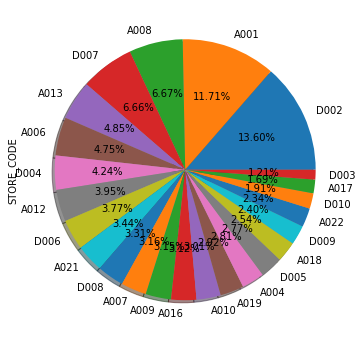

In [237]:
df_new["STORE_CODE"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

### 4.2.3 价格分析

对于价格，可以看下所有商品价格的分布，这样可以知道什么价格的商品卖的最好：

In [127]:
bins = np.arange(0, 5000, 500)
print(pd.cut(df_new.ITEM_SPEND, bins).value_counts())

(0, 500]        1046175
(500, 1000]         341
(1000, 1500]        135
(1500, 2000]         66
(2000, 2500]         38
(2500, 3000]         14
(3500, 4000]         13
(4000, 4500]         11
(3000, 3500]          7
Name: ITEM_SPEND, dtype: int64


(array([1.046675e+06, 3.840000e+02, 1.390000e+02, 6.700000e+01,
        2.900000e+01, 2.400000e+01, 7.000000e+00, 1.300000e+01,
        1.100000e+01]),
 array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]),
 <a list of 9 Patch objects>)

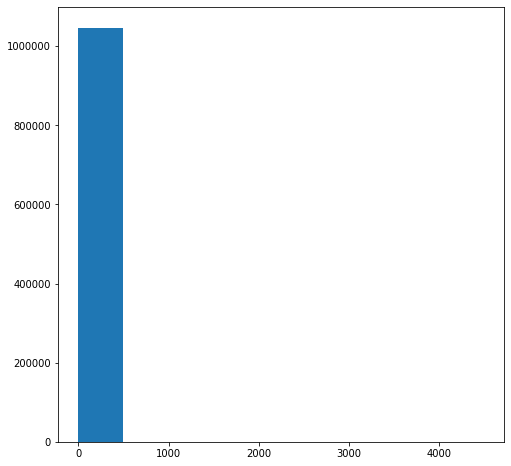

In [128]:
plt.figure(figsize=(8, 8))
plt.hist(df_new['ITEM_SPEND'], bins)

In [129]:
bins1 = np.arange(0, 1000, 100)
print(pd.cut(df_new.ITEM_SPEND, bins1).value_counts())

(0, 100]      1036544
(100, 200]       7255
(200, 300]       1668
(300, 400]        408
(400, 500]        300
(500, 600]        118
(600, 700]         84
(700, 800]         50
(800, 900]         43
Name: ITEM_SPEND, dtype: int64


(array([1.036823e+06, 7.428000e+03, 1.743000e+03, 4.240000e+02,
        2.570000e+02, 1.600000e+02, 8.600000e+01, 5.400000e+01,
        4.400000e+01]),
 array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900]),
 <a list of 9 Patch objects>)

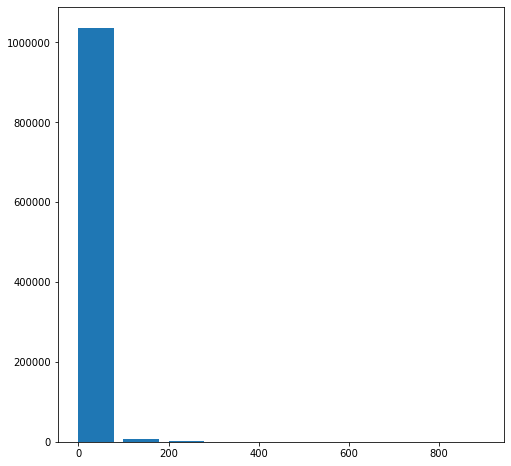

In [130]:
plt.figure(figsize=(8, 8))
plt.hist(df_new['ITEM_SPEND'], bins1,width=78)

In [131]:
bins2 = np.arange(0, 100, 10)
print(pd.cut(df_new.ITEM_SPEND, bins2).value_counts())

(0, 10]     698386
(10, 20]    213922
(20, 30]     56738
(30, 40]     21829
(40, 50]     15839
(50, 60]     14083
(60, 70]      6739
(70, 80]      4112
(80, 90]      2707
Name: ITEM_SPEND, dtype: int64


(array([693189., 217501.,  58131.,  22261.,  15640.,  14036.,   7140.,
          4095.,   2911.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

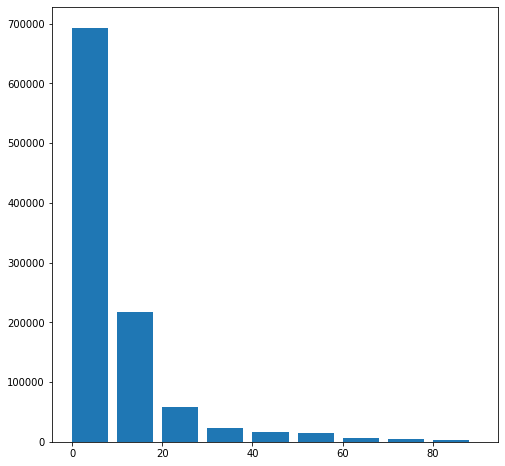

In [132]:
plt.figure(figsize=(8, 8))
plt.hist(df_new['ITEM_SPEND'], bins2,width=8)

In [133]:
bins3 = np.arange(0, 50, 5)
print(pd.cut(df_new.ITEM_SPEND, bins3).value_counts())

(0, 5]      376946
(5, 10]     321440
(10, 15]    150824
(15, 20]     63098
(20, 25]     31019
(25, 30]     25719
(35, 40]     11902
(30, 35]      9927
(40, 45]      6289
Name: ITEM_SPEND, dtype: int64


(array([365373., 327816., 153896.,  63605.,  30610.,  27521.,   9292.,
         12969.,   6631.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
 <a list of 9 Patch objects>)

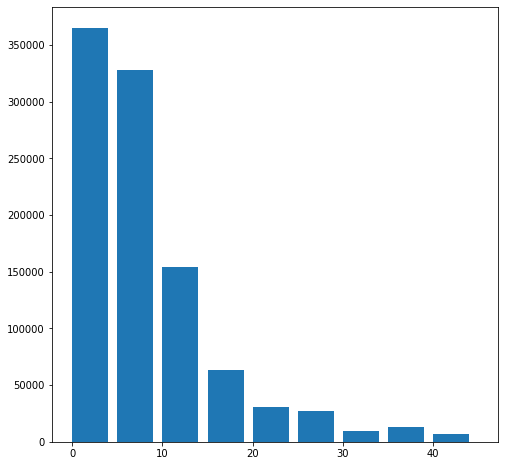

In [134]:
plt.figure(figsize=(8, 8))
plt.hist(df_new['ITEM_SPEND'], bins3,width=4)

In [135]:
bins4 = np.arange(0, 10, 1)
print(pd.cut(df_new.ITEM_SPEND, bins4).value_counts())

(3, 4]    96524
(2, 3]    90439
(4, 5]    81491
(5, 6]    73502
(1, 2]    70884
(8, 9]    64375
(6, 7]    60033
(7, 8]    57631
(0, 1]    37608
Name: ITEM_SPEND, dtype: int64


(array([ 16224.,  70455.,  87704., 102183.,  88807.,  75017.,  65759.,
         55473.,  71414.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

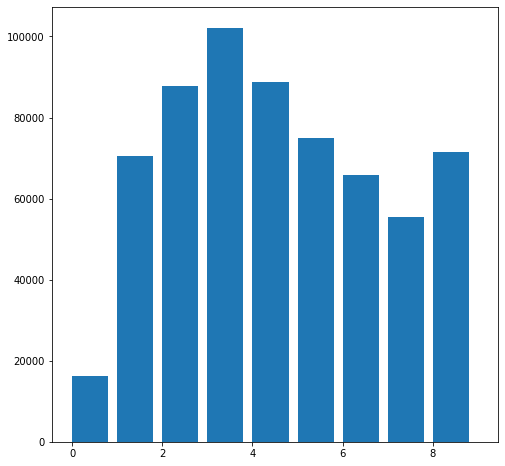

In [136]:
plt.figure(figsize=(8,8))
plt.hist(df_new['ITEM_SPEND'], bins4,width=0.8)

从上面可以看出，价格在2-5之间的商品卖的最好，大部分商品价格在0-10之间，所以可以考虑进一步增加这些价格区间的商品。

In [137]:
bin = np.arange(0, 5000, 500)
print(pd.cut(df_new2.BASK_SPEND, bin).value_counts())

(0, 500]        568396
(500, 1000]        882
(1000, 1500]       187
(1500, 2000]       127
(2000, 2500]        61
(2500, 3000]        21
(3500, 4000]        20
(3000, 3500]        17
(4000, 4500]        12
Name: BASK_SPEND, dtype: int64


(array([5.68338e+05, 9.28000e+02, 1.96000e+02, 1.27000e+02, 5.20000e+01,
        3.10000e+01, 1.90000e+01, 2.00000e+01, 1.20000e+01]),
 array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]),
 <a list of 9 Patch objects>)

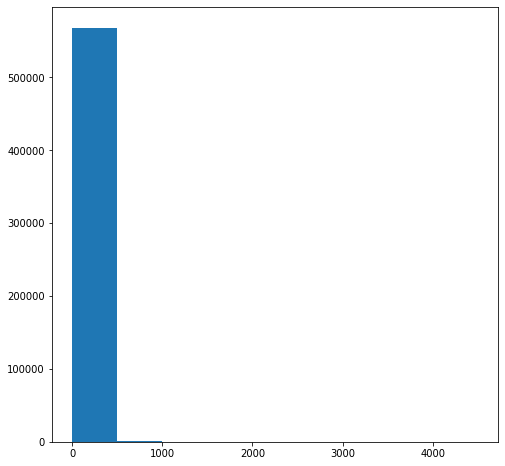

In [138]:
plt.figure(figsize=(8, 8))
plt.hist(df_new2['BASK_SPEND'], bin)

In [139]:
bin1 = np.arange(0, 1000, 100)
print(pd.cut(df_new2.BASK_SPEND, bin1).value_counts())

(0, 100]      526616
(100, 200]     33540
(200, 300]      5903
(300, 400]      1604
(400, 500]       733
(500, 600]       389
(600, 700]       180
(700, 800]       120
(800, 900]       116
Name: BASK_SPEND, dtype: int64


(array([5.26333e+05, 3.37120e+04, 5.96800e+03, 1.64100e+03, 6.84000e+02,
        4.37000e+02, 1.85000e+02, 1.22000e+02, 1.19000e+02]),
 array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900]),
 <a list of 9 Patch objects>)

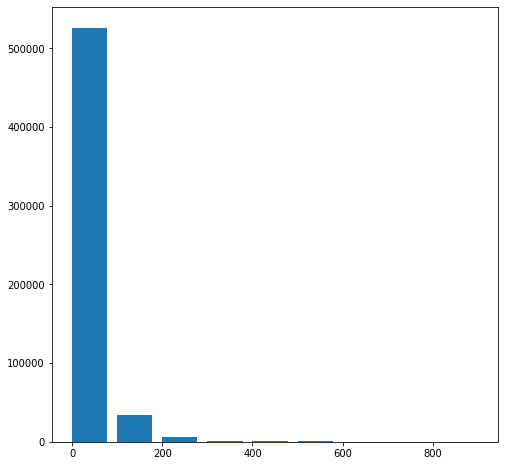

In [140]:
plt.figure(figsize=(8, 8))
plt.hist(df_new2['BASK_SPEND'], bin1,width=78)

In [141]:
bin2 = np.arange(0, 100, 10)
print(pd.cut(df_new2.BASK_SPEND, bin2).value_counts())

(0, 10]     163449
(10, 20]    123687
(20, 30]     76874
(30, 40]     47267
(40, 50]     34950
(50, 60]     27281
(60, 70]     18741
(70, 80]     14250
(80, 90]     10841
Name: BASK_SPEND, dtype: int64


(array([159896., 124691.,  78389.,  47715.,  34713.,  27654.,  18920.,
         14347.,  11015.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

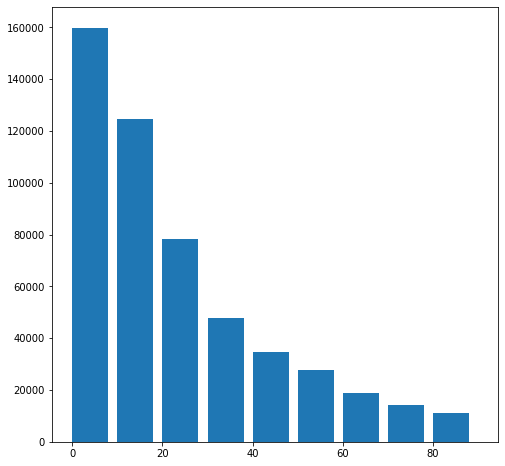

In [142]:
plt.figure(figsize=(8, 8))
plt.hist(df_new2['BASK_SPEND'], bin2,width=8)

In [143]:
bin3 = np.arange(0, 50, 5)
print(pd.cut(df_new2.BASK_SPEND, bin3).value_counts())

(5, 10]     91648
(0, 5]      71801
(10, 15]    69724
(15, 20]    53963
(20, 25]    42321
(25, 30]    34553
(30, 35]    24729
(35, 40]    22538
(40, 45]    17664
Name: BASK_SPEND, dtype: int64


(array([67810., 92086., 70689., 54002., 42293., 36096., 24890., 22825.,
        18250.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
 <a list of 9 Patch objects>)

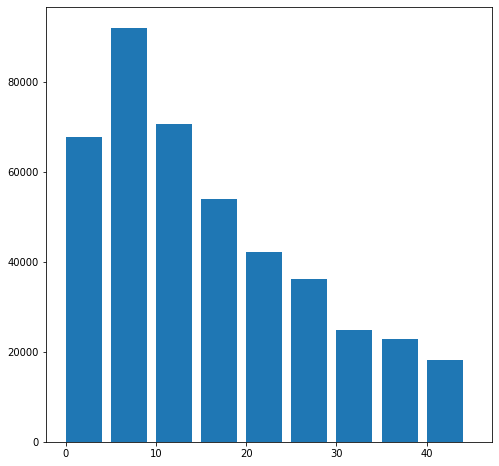

In [144]:
plt.figure(figsize=(8, 8))
plt.hist(df_new2['BASK_SPEND'], bin3,width=4)

In [145]:
bin4 = np.arange(0, 10, 1)
print(pd.cut(df_new2.BASK_SPEND, bin4).value_counts())

(8, 9]    19324
(3, 4]    18868
(2, 3]    18712
(7, 8]    18086
(5, 6]    17265
(4, 5]    16780
(6, 7]    16038
(1, 2]    12465
(0, 1]     4976
Name: BASK_SPEND, dtype: int64


(array([ 1076., 10972., 16123., 21234., 18405., 16952., 17727., 17645.,
        22380.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

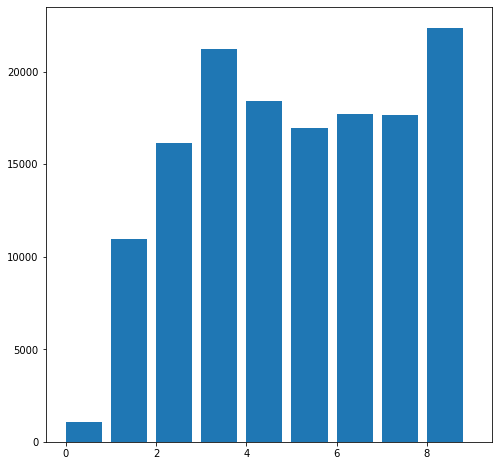

In [146]:
plt.figure(figsize=(8,8))
plt.hist(df_new2['BASK_SPEND'], bin4,width=0.8)

从上面可以看出，价格在8-10之间的商品卖的最好，大部分商品价格在8-15之间，所以可以考虑进一步增加这些价格区间的商品。

### 4.2.4 时间分析

In [147]:
sales_day = df_new.groupby(['SDATE']).count()['ITEM_SPEND']
sales_day#每日销售量

SDATE
2018-06-01    57099
2018-06-02    59065
2018-06-03    53388
2018-06-04    42451
2018-06-05    46529
2018-06-06    42469
2018-06-07    36539
2018-06-08    45053
2018-06-09    53111
2018-06-10    57783
2018-06-11    41505
2018-06-12    44334
2018-06-13    57814
2018-06-14    47707
2018-06-15    53333
2018-06-16    71524
2018-06-17    87065
2018-06-18    76179
2018-06-19    11010
2018-06-20    22205
2018-06-22    12295
2018-06-24    18861
2018-06-25    10070
Name: ITEM_SPEND, dtype: int64

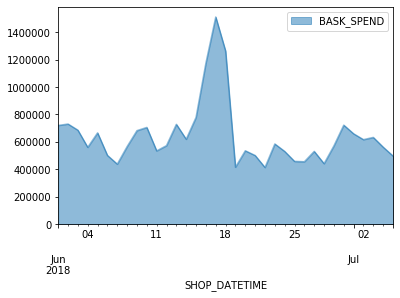

In [231]:
#用面积图可视化
sales_day.plot.area(stacked=False)

从结果可以看出，每天里所有超市加起来的销售量，2018-06-16至2018-06-18日销售量相对于其他几日较高，我们画图来看：

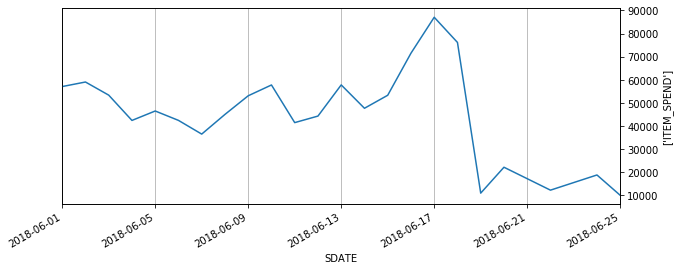

In [148]:
import matplotlib.pyplot as plt
ax = sales_day.plot(
    secondary_y=['ITEM_SPEND'],
    x_compat=True,
    grid=True,figsize=(10,4))
ax.set_ylabel(['ITEM_SPEND'])
plt.show()

In [149]:
sales_day2 = df_new2.groupby(['SHOP_DATETIME']).count()['BASK_SPEND']
sales_day2#每日销售量

SHOP_DATETIME
2018-06-01    17782
2018-06-02    18390
2018-06-03    17271
2018-06-04    15043
2018-06-05    16391
2018-06-06    15418
2018-06-07    13660
2018-06-08    15473
2018-06-09    16740
2018-06-10    18306
2018-06-11    14764
2018-06-12    15322
2018-06-13    19179
2018-06-14    16234
2018-06-15    17728
2018-06-16    21675
2018-06-17    26354
2018-06-18    23992
2018-06-19    11366
2018-06-20    15404
2018-06-21    13928
2018-06-22    11771
2018-06-23    16203
2018-06-24    15250
2018-06-25    13416
2018-06-26    13624
2018-06-27    16244
2018-06-28    13237
2018-06-29    15086
2018-06-30    17478
2018-07-01    17431
2018-07-02    14591
2018-07-03    15678
2018-07-04    16197
2018-07-05    13171
Name: BASK_SPEND, dtype: int64

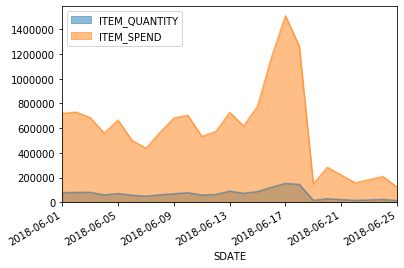

In [230]:
#用面积图可视化
sales_day2.plot.area(stacked=False)

同样，从结果可以看出，每天里所有超市加起来的销售量，2018-06-16至2018-06-18日销售量相对于其他几日较高，我们画图来看：

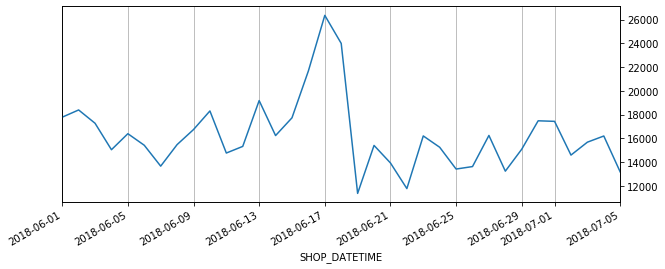

In [150]:
import matplotlib.pyplot as plt
ax2 = sales_day2.plot(
    secondary_y=['BASK_SPEND'],
    x_compat=True,
    grid=True,figsize=(10,4))
ax.set_ylabel(['BASK_SPEND'])
plt.show()

按照每家超市进行分析

将数据集拆分为24家超市，以销量排名第一的A001超市为例：

In [54]:
A001 = df_new[df_new['STORE_CODE'].isin(["A001"])] # 选取A001的数据
A001.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
808,2018-06-02,A001,6,229611,15930,1.0,1.8,1.800000,n,0.0
809,2018-06-02,A001,6,229611,15930,1.0,1.8,1.800000,n,0.0
810,2018-06-02,A001,2,125591,147631,12.0,55.0,4.583333,n,0.0
811,2018-06-02,A001,6,229732,157209,1.0,7.5,7.500000,n,0.0
812,2018-06-02,A001,6,229733,148937,1.0,2.5,2.500000,n,0.0


In [74]:

A001_2 = df_new2[df_new2['STORE_CODE'].isin(["A001"])] # 选取A001的数据
A001_2.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
24,2018-06-02,A001,6,229732,7.50
25,2018-06-02,A001,3,25793,52.95
26,2018-06-02,A001,6,229639,46.80
27,2018-06-02,A001,6,229708,30.38
28,2018-06-02,A001,6,229785,21.30


查看消费金额的基本统计信息，进而分析A001超市的顾客的购买行为

In [75]:
A001["ITEM_SPEND"].describe()

count    122641.000000
mean         19.679763
std         280.611880
min           0.000000
25%           4.500000
50%           8.900000
75%          15.500000
max       69120.000000
Name: ITEM_SPEND, dtype: float64

In [76]:
A001_2["BASK_SPEND"].describe()

count    66507.000000
mean        52.300478
std        441.570974
min          0.010000
25%         10.800000
50%         23.800000
75%         52.560000
max      79920.000000
Name: BASK_SPEND, dtype: float64

In [77]:


A001_2['SHOP_DATETIME'] = pd.to_datetime(A001_2['SHOP_DATETIME'])
A001_2['SHOP_DATETIME']= A001_2['SHOP_DATETIME'].apply(lambda x: x.weekday() + 1)
A001_2.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
24,6,A001,6,229732,7.50
25,6,A001,3,25793,52.95
26,6,A001,6,229639,46.80
27,6,A001,6,229708,30.38
28,6,A001,6,229785,21.30


In [79]:
A001_2 = A001_2.groupby('SHOP_DATETIME')['BASK_CODE'].nunique()
A001_2 = A001_2.to_frame().reset_index()
A001_2.columns = ['WEEK', 'BASK_NUM']
A001_2

,WEEK,BASK_NUM
0,1,9039
1,2,8202
2,3,10056
3,4,8229
4,5,9045
5,6,10526
6,7,11161


([<matplotlib.patches.Wedge at 0x1a2c4f8cd0>,
 [Text(1.000512451038911, 0.4571376546688217, 'week1'),
  Text(0.35097090054237856, 1.0425063198717175, 'week2'),
  Text(-0.5664480084241832, 0.9429404295883577, 'week3'),
  Text(-1.0854427614268498, 0.178364827435386, 'week4'),
  Text(-0.8715682488421478, -0.671095215010681, 'week5'),
  Text(0.014655426132955169, -1.0999023677058168, 'week6'),
  Text(0.9495358720557502, -0.5553211932560528, 'week7')],
 [Text(0.5457340642030423, 0.2493478116375391, '13.6%'),
  Text(0.19143867302311554, 0.5686398108391186, '12.4%'),
  Text(-0.3089716409586454, 0.5143311434118314, '15.2%'),
  Text(-0.5920596880510088, 0.09728990587384691, '12.4%'),
  Text(-0.47540086300480777, -0.3660519354603714, '13.7%'),
  Text(0.007993868799793727, -0.5999467460213546, '15.9%'),
  Text(0.5179286574849545, -0.30290246904875606, '16.8%')])

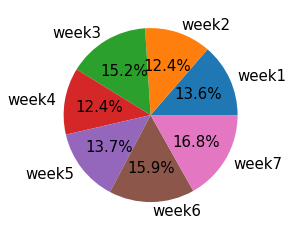

In [81]:

plt.figure(figsize=(6, 4))
plt.rcParams["font.size"] = "15"
weeks=['week1','week2','week3','week4','week5','week6','week7']
plt.pie(A001_2['BASK_NUM'],labels=weeks,autopct="%3.1f%%")


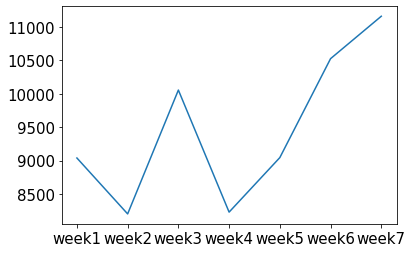

In [83]:


plt.figure(figsize=(6, 4))
plt.rcParams["font.size"] = "15"
weeks=['week1','week2','week3','week4','week5','week6','week7']
plt.plot(weeks,A001_2["BASK_NUM"])


In [ ]:
从以上图表中我们可以发现，周六周天的销售量较大，可以在周末多分配些人手。

In [160]:
Market_day_Sales = df_new.groupby(['STORE_CODE','BASK_CODE']).agg({'ITEM_SPEND':'sum'}).reset_index().rename(columns={'ITEM_SPEND':'Sales_amounts'})
Market_day_Sales.head()


,STORE_CODE,BASK_CODE,Sales_amounts
0,A001,7705,4.4
1,A001,7707,64.3
2,A001,7708,32.4
3,A001,7709,24.5
4,A001,7710,15.0


上边的结果是2018-06-01至2018-06-25每个超市每天的销售量

In [161]:
Market_day_Sales2 = df_new2.groupby(['STORE_CODE','SHOP_DATETIME']).agg({'BASK_SPEND':'sum'}).reset_index().rename(columns={'BASK_SPEND':'Sales_amounts'})
Market_day_Sales2.head()

,STORE_CODE,SHOP_DATETIME,Sales_amounts
0,A001,2018-06-01,102185.58
1,A001,2018-06-02,79059.66
2,A001,2018-06-03,79557.52
3,A001,2018-06-04,54298.34
4,A001,2018-06-05,81909.57


上边的结果是2018-06-01至2018-07-05每个超市每天的销售量

In [162]:

Market_Sales = df_new.groupby(['SDATE','STORE_CODE']).agg({'ITEM_SPEND':'sum'}).reset_index().rename(columns={'ITEM_SPEND':'Sales_amounts'})
Market_Sales.head()

,SDATE,STORE_CODE,Sales_amounts
0,2018-06-01,A001,102185.58
1,2018-06-01,A004,14153.55
2,2018-06-01,A006,26030.72
3,2018-06-01,A007,17946.88
4,2018-06-01,A008,30686.86


In [163]:
Market_Sales2 = df_new2.groupby(['SHOP_DATETIME','STORE_CODE']).agg({'BASK_SPEND':'sum'}).reset_index().rename(columns={'BASK_SPEND':'Sales_amounts'})
Market_Sales2.head()

,SHOP_DATETIME,STORE_CODE,Sales_amounts
0,2018-06-01,A001,102185.58
1,2018-06-01,A004,14153.55
2,2018-06-01,A006,26030.72
3,2018-06-01,A007,17946.88
4,2018-06-01,A008,30686.86


In [213]:

sales_time = df_new2[['SHOP_DATETIME','BASK_SPEND']]
sales_day = sales_time.groupby(['SHOP_DATETIME']).sum()
sales_day.style.background_gradient()

,BASK_SPEND
SHOP_DATETIME,
2018-06-01 00:00:00,719668
2018-06-02 00:00:00,730030
2018-06-03 00:00:00,685279
2018-06-04 00:00:00,560063
2018-06-05 00:00:00,665581
2018-06-06 00:00:00,501199
2018-06-07 00:00:00,437448
2018-06-08 00:00:00,565652
2018-06-09 00:00:00,681885


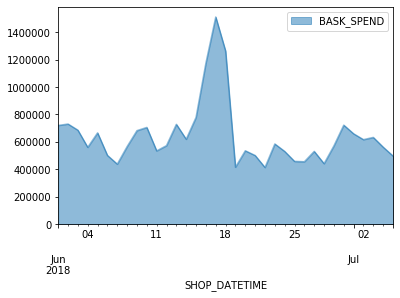

In [228]:
#用面积图可视化
sales_day.plot.area(stacked=False)

In [218]:


sales_time2 = df_new[['SDATE','ITEM_QUANTITY','ITEM_SPEND']]
sales_day2 = sales_time2.groupby(['SDATE']).sum()
sales_day2.style.background_gradient()

,ITEM_QUANTITY,ITEM_SPEND
SDATE,,
2018-06-01 00:00:00,78168.4,719668
2018-06-02 00:00:00,79518.9,730030
2018-06-03 00:00:00,80749.5,685279
2018-06-04 00:00:00,59288,560063
2018-06-05 00:00:00,70539.3,665581
2018-06-06 00:00:00,57260.1,501199
2018-06-07 00:00:00,49093,437448
2018-06-08 00:00:00,60346.5,565648
2018-06-09 00:00:00,68745.2,681885


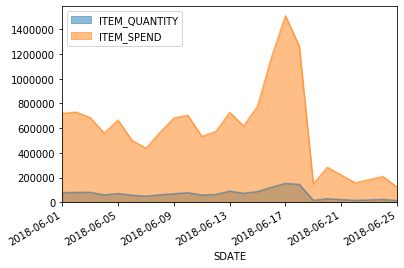

In [227]:
#用面积图可视化
sales_day2.plot.area(stacked=False)

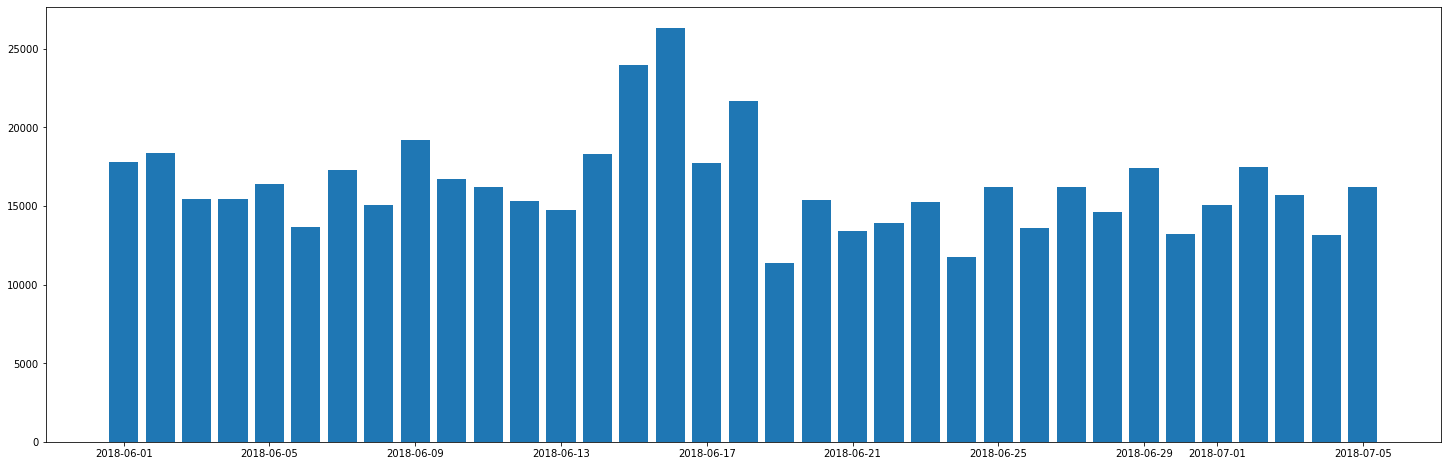

In [110]:
plt.figure(figsize=(25, 8))
day2 = df_new2["SHOP_DATETIME"].unique()
order_count2 = df_new2.groupby(by='SHOP_DATETIME').count()["BASK_SPEND"]
plt.bar(day2, order_count2)                 
plt.show()
#从上图可以看出，每天的花费数并不均衡。最高峰集中在中后旬，后旬消费者花费明显下降。针对这一现象可以着重考虑如何提高后旬的销量。

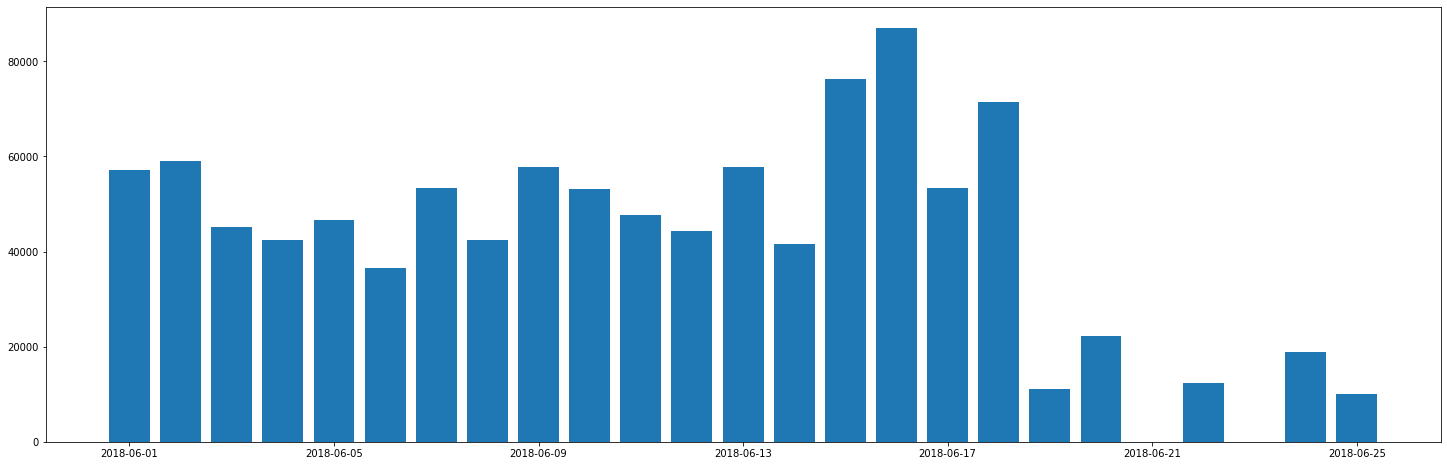

In [111]:
plt.figure(figsize=(25, 8))
day = df_new["SDATE"].unique()
order_count = df_new.groupby(by='SDATE').count()["ITEM_SPEND"]
plt.bar(day, order_count)                 
plt.show()
#从上图可以看出，每天的花费数并不均衡。最高峰集中在中后旬，后旬消费者花费明显下降。针对这一现象可以着重考虑如何提高后旬的销量。

从下图可以看出每天中每个超市的商品数量

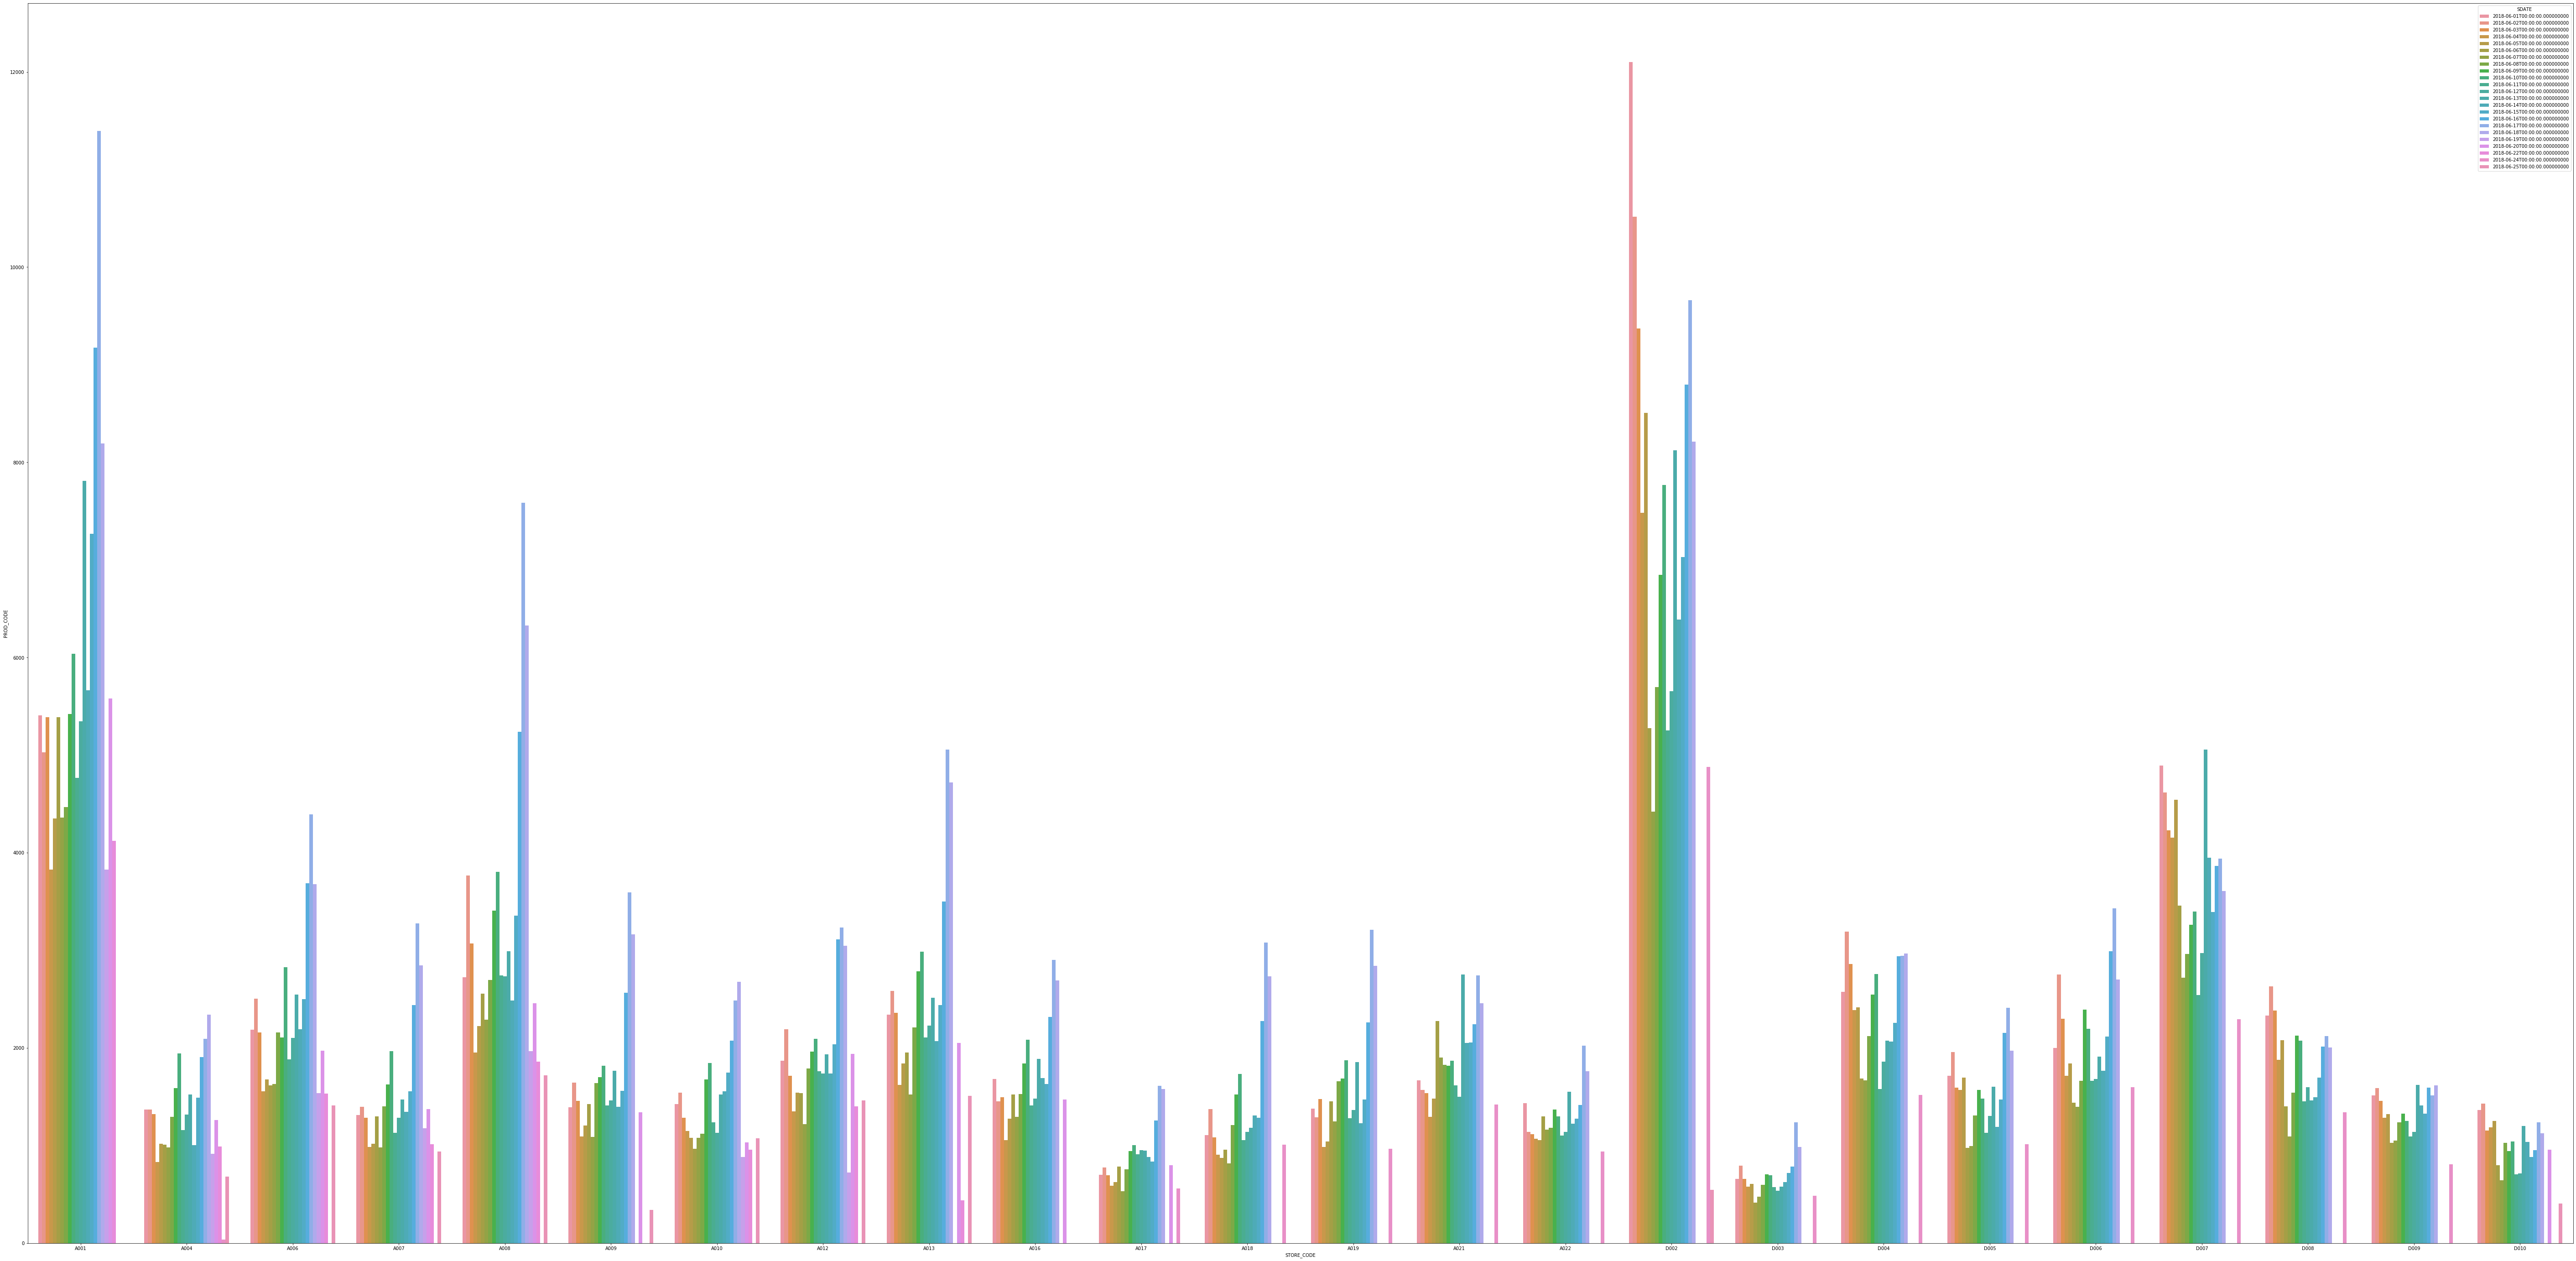

In [171]:

fig = plt.figure(figsize=(100,50))
Segment_Year = df.groupby(["STORE_CODE", 'SDATE']).agg({'PROD_CODE':'count'}).reset_index()
sns.barplot(x='STORE_CODE', y='PROD_CODE', hue='SDATE', data = Segment_Year)
#plt.title('2011-2014 Segment Customer')

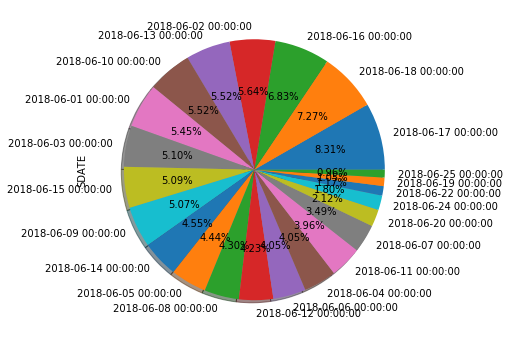

In [240]:
df_new["SDATE"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

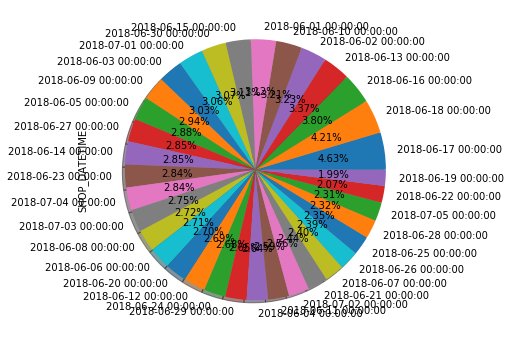

In [241]:
df_new2["SHOP_DATETIME"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

### 4.2.5 折扣分析

接下来我们来看下，哪种类型的折扣优惠力度最大

In [155]:
Discount_Sales = df_new.groupby(['DISCOUNT_TYPE']).agg({'DISCOUNT_AMOUNT':'sum'}).reset_index().rename(columns={'DISCOUNT_AMOUNT':'discount_amounts'})
Discount_Sales

,DISCOUNT_TYPE,discount_amounts
0,Z,-1772.22
1,h,-0.10
2,m,-540636.41
3,n,-116307.13
4,p,-1300327.29
5,q,-39261.60
6,s,-669.55
7,v,-61434.09
8,x,-4161.60


In [219]:

Discount_Sales.style.background_gradient()

,DISCOUNT_TYPE,discount_amounts
0,Z,-1772.22
1,h,-0.1
2,m,-540636
3,n,-116307
4,p,-1.30033e+06
5,q,-39261.6
6,s,-669.55
7,v,-61434.1
8,x,-4161.6


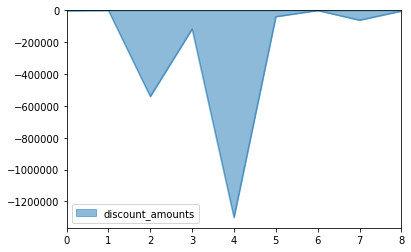

In [226]:
#用面积图可视化
Discount_Sales.plot.area(stacked=False)

从上面的结果可以看出，折扣类型为P的打折力度最大，而折扣类型为h的力度最小。

下面我们来看，哪种类型的折扣最吸引消费者，花费的最多

In [156]:

Discount_Spends = df_new.groupby(['DISCOUNT_TYPE']).agg({'ITEM_SPEND':'sum'}).reset_index().rename(columns={'ITEM_SPEND':'discount_spends'})
Discount_Spends

,DISCOUNT_TYPE,discount_spends
0,Z,4.579980e+03
1,h,2.150000e+01
2,m,1.791560e+06
3,n,8.407412e+06
4,p,3.879655e+06
5,q,4.162330e+04
6,s,1.402700e+03
7,v,1.677978e+05
8,x,5.953920e+04


In [220]:

Discount_Spends.style.background_gradient()

,DISCOUNT_TYPE,discount_spends
0,Z,4579.98
1,h,21.5
2,m,1.79156e+06
3,n,8.40741e+06
4,p,3.87965e+06
5,q,41623.3
6,s,1402.7
7,v,167798
8,x,59539.2


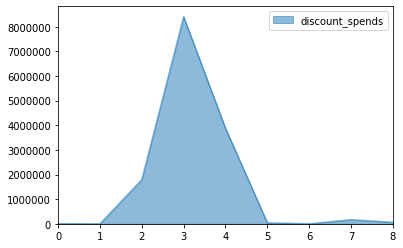

In [225]:
#用面积图可视化
Discount_Spends.plot.area(stacked=False)

折扣类型为n的销售额最高，折扣类型为h的销售额最低，超市可以根据此结果调整折扣类型，考虑如何打折优惠才能促进消费者消费。

因为每位消费者会拿一个购物篮，所以购物篮的个数也代表着消费者的人数。我们下面来看一下哪种折扣类型会吸引最多的消费者。

In [157]:
Discount_Basks = df_new.groupby(['DISCOUNT_TYPE']).agg({'BASK_CODE':'sum'}).reset_index().rename(columns={'BASK_CODE':'discount_basks'})
Discount_Basks


,DISCOUNT_TYPE,discount_basks
0,Z,5152980
1,h,31409
2,m,19462427570
3,n,107350245919
4,p,40069915116
5,q,189394948
6,s,673975
7,v,1638530533
8,x,87166991


In [221]:
Discount_Basks.style.background_gradient()

,DISCOUNT_TYPE,discount_basks
0,Z,5152980
1,h,31409
2,m,19462427570
3,n,107350245919
4,p,40069915116
5,q,189394948
6,s,673975
7,v,1638530533
8,x,87166991


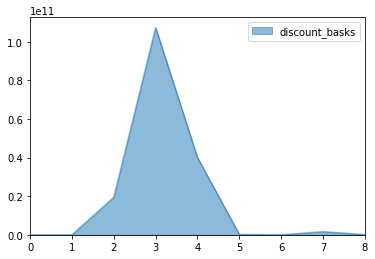

In [224]:
#用面积图可视化
Discount_Basks.plot.area(stacked=False)

选择折扣类型为n的商品的消费者最多，选择折扣类型为h的商品的消费者最少

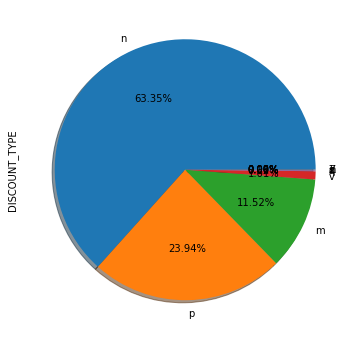

In [239]:
df_new["DISCOUNT_TYPE"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

### 4.2.6 POS机分析

       由于POS机代表着超市的出口，我们接下来分析消费者会选择哪个出口出超市，也就是哪个出口能够方便消费者。比如，某个出口靠近停车场，开车的消费者会不会比走路的消费者消费高？或者，某个出口挨着某个服装店，人们会喜欢逛完超市去服装店逛吗？我们可以根据消费者喜欢哪个出口调整POS机数量及销售人员人数。

In [247]:
Pos_Amounts = df_new.groupby(['STORE_CODE','POSID']).agg({'ITEM_QUANTITY':'sum'}).reset_index().rename(columns={'ITEM_QUANTITY':'pos_amounts'})
Pos_Amounts

,STORE_CODE,POSID,pos_amounts
0,A001,1,11721.758
1,A001,2,54841.086
2,A001,3,43908.855
3,A001,5,3007.606
4,A001,6,38934.478
5,A001,9,39494.982
6,A001,10,7733.000
7,A004,1,233.508
8,A004,2,39945.904
9,A004,4,790.582


In [222]:
Pos_Amounts.style.background_gradient()

,STORE_CODE,POSID,pos_amounts
0,A001,1,11721.8
1,A001,2,54841.1
2,A001,3,43908.9
3,A001,5,3007.61
4,A001,6,38934.5
5,A001,9,39495
6,A001,10,7733
7,A004,1,233.508
8,A004,2,39945.9
9,A004,4,790.582


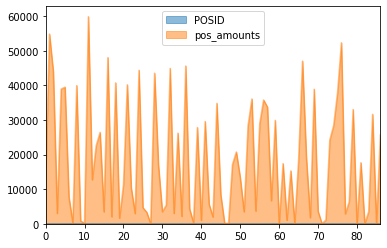

In [223]:
#用面积图可视化
Pos_Amounts.plot.area(stacked=False)

从上面的POS机可以看出：

A001超市中，使用POS机2收费的最多；

A004超市中，使用POS机2收费的最多；

A006超市中，使用POS机2收费的最多；

A007超市中，使用POS机2收费的最多；

A008超市中，使用POS机1收费的最多；

A009超市中，使用POS机1收费的最多；

A010超市中，使用POS机2收费的最多；

A012超市中，使用POS机2收费的最多；

A013超市中，使用POS机2收费的最多；

A016超市中，使用POS机1收费的最多；

A017超市中，使用POS机1收费的最多；

A018超市中，使用POS机1收费的最多；

A019超市中，使用POS机1收费的最多；

A021超市中，使用POS机3收费的最多；

A022超市中，使用POS机2收费的最多；

D002超市中，使用POS机1收费的最多；

D003超市中，使用POS机2收费的最多；

D004超市中，使用POS机1收费的最多；

D005超市中，使用POS机2收费的最多；

D006超市中，使用POS机3收费的最多；

D007超市中，使用POS机3收费的最多；

D008超市中，使用POS机1收费的最多；

D009超市中，使用POS机3收费的最多；

D010超市中，使用POS机3收费的最多；

每个超市可以根据商品数量调整每个出口POS机的数量以及收费人员的数量。

### 5、总结

  本次作业有两个数据集，分别是Basket-2018-06-01-2018-07-05数据集和item-2018-06-01-2018-07-05数据集，Basket-2018-06-01-2018-07-05数据集包括日期、超市编码、POS机编码、购物篮编码、购物篮包含的货物总价格。item-2018-06-01-2018-07-05数据集包括日期、超市编码、POS机ID、购物篮编码、商品编码、商品数量、商品价格、日常价格、折扣类型、折扣数量。
  
  首先对数据进行预处理，item-2018-06-01-2018-07-05有1048575条，Basket-2018-06-01-2018-07-05有571552条，从数据的分布情况我们可以看出item-2018-06-01-2018-07-05数据集中ITEM_QUANTITY有负值，这不符合现实情况，予以删除，删除了1186条，现在的数据有1047389条。另外Basket-2018-06-01-2018-07-05数据集中BASK_SPEND有负值不符合现实情况，予以删除，删除了1755条，现在的数据有569797条。
       
   接下对数据的总体情况分析，item-2018-06-01-2018-07-05数据集有23天、24个超市、13个POS机、222126个购物篮、17424个商品、9个折扣类型。Basket-2018-06-01-2018-07-05数据集有35天、24个超市、280816个购物篮、13个POS机。
       
   最后对各维度分析。分析数据可以从两方面开始考虑，一个是维度，一个是指标，维度可以看做x轴，指标可以看成是y轴，同一个维度可以分析多个指标，同一个维度也可以做降维升维。

### （1）超市维度分析

    1)Basket-2018-06-01-2018-07-05数据集

    购物篮的数量反映了消费者人数，我们首先分析了人流前10名的超市，分别是：

    超市           消费者人数

    A001          66507

    D002          62949

    D007          37503

    A008          36462

    A013          30064

    A006          28470

    A012          24946

    A009          21809

    D004          21362

    D008          21029
    
    人流前10名的超市，分别是：

    超市         消费者人数
     
    A007         17954

    A019         16985

    D009         15827

    A018         15731

    D005         15261

    A022         15260

    A004         13429

    A017         12459

    D010         11070

    D003         7771
    
    接下来分析销售额前十名的超市，分别是:

    超市        销售额
     
    A001        3.478348e+06

    D002        3.177385e+06

    D007        1.382203e+06

    A008        1.324641e+06

    A013        1.126551e+06

    A006        9.439233e+05

    A012        8.546610e+05

    D004        8.153388e+05

    D006        8.144365e+05

    A009        8.052129e+05
    
    销售额后十名的超市，分别是:
    
    超市         销售额
    A010        653372.90
    
    A019        650797.35
    
    A018        563395.09
    
    D005        561386.80
    
    A004        515663.06
    
    A022        488646.16
    
    D009        473629.18
    
    A017        401767.00
    
    D010        364347.25
    
    D003        253080.72
    
    人流和销售额都前十名的超市是'A001', 'D002', 'D007', 'A008', 'A013', 'A006', 'A012', 'D004', 'A009'。

    2)item-2018-06-01-2018-07-05数据集
    
    首先看销量前10名的超市，分别是:
    
    超市      销量
    
    D002     142433
    
    A001     122641
    
    A008     69861
    
    D007     69800
    
    A013     50781
    
    A006     49792
    
    D004     44387
    
    A012     41336
    
    D006     39518
    
    A021     36025

    销量后10名的超市，分别是：

    超市      销量

    A010     31503

    A019     30549

    A004     29420

    D005     29063

    A018     26636

    D009     25149

    A022     24537

    D010     20055

    A017     17701

    D003     12699

    再看一下销售额前十名的超市，分别是：
    
    超市      销售额
    
    A001     2.413546e+06
    
    D002     1.934742e+06
    
    A008     9.145735e+05
    
    D007     8.436205e+05
    
    A013     7.538393e+05
    
    A006     6.378124e+05
    
    A012     5.712609e+05
    
    A007     5.008311e+05
    
    A009     4.959406e+05
    
    D004     4.923083e+05
    
    销售额后十名的超市，分别是：
    
    超市      销售额
    
    D008     416171.37
    
    A019     410409.35
    
    A004     344320.75
    
    D005     329099.65
    
    A018     325387.19
    
    A022     282829.62
    
    D009     274901.19
    
    A017     254315.82
    
    D010     219562.27
    
    D003     148591.63
    
  
看下销量和销售额都排名前10的超市：'A001', 'D002', 'A008', 'D007', 'A013', 'A006', 'A012', 'D004'

对销售额/销量排名前十名的超市可以采取增加库存，增加推广成本等措施来进一步提升销量。而对于销售额/销量排名后几名的超市，则需要进行调研分析，学习前两名超市的运营模式、策略，确定超市销售额低下的原因，采取一定措施进行超市销量的提升，也可以考虑适当减少这些商品的库存，以减少损失。一共有8个超市销量和销售额表现优秀， 因此，我们可以针对这些超市开展更多的优惠活动或者线下活动，进一步提升销量。


### （2）商品维度分析

    首先是销量前十名的商品：

    商品         销量

    194690      6817

    205540      6665

    21835       6590
 
    178462      5434

    72811       5105

    197532      4217

    205437      4097

    75283       4022

    109584      3936

    219118      3895

    销量后十名的商品

    商品        销量

    14892       1

    210299      1

    184111      1

    82071       1

    82072       1

    184103      1

    184098      1

    210347      1

    184097      1

    127039      1
    
    销售额前十名的商品
    
    商品        销售额
    
    7137       249882.00

    136839     208752.00

    7133       191072.00

    149413     132348.66

    154900     101912.70

    220834     99910.55

    1239       94450.00

    88160      82633.00

    11929      77989.50

    220320     70800.00
    
    销售额后十名的商品：
    
    商品         销售额
    
    203593      1.40
    
    56482       1.15
    
    213291      1.00
    
    107638      1.00
    
    187232      1.00
    
    10948       1.00
    
    24925       0.82
    
    174623      0.60
    
    2628        0.50
    
    5588        0.50
对销售额/销量排名前十名的商品可以采取增加库存，增加推广成本等措施来进一步提升销量。而对于销售额/销量排名后十名的商品，则需要进行调研分析，确定商品销售额低下的原因，采取一定措施进行商品销量的提升，也可以考虑适当减少这些商品的库存，以减少损失。

销量和销售额最后10个商品为14892, 210299, 184111, 82071, 82072, 184103, 184098, 210347, 184097, 127039
，如果销量和销售额都不达标，这些商品需要看看是不是要优化或者下架


### （3）价格维度分析

1）Basket-2018-06-01-2018-07-05数据集

我们对不同区间价格的销售额进行分析，找出什么价格的商品卖的最好，以5000为区间，0-500销售额最高。以1000为区间，0-100销售额最高，以100为区间，0-10销售额最高。以0-50为区间，0-10销售额最高，以0-10为区间，单价为2-4销售额最高，可以考虑进一步增加这些价格区间的商品。

2）item-2018-06-01-2018-07-05数据集

以5000为区间，0-500销售额最高。以1000为区间，0-100销售额最高，以100为区间，0-20销售额最高。以0-50为区间，0-15销售额最高，以0-10为区间，单价为8-10销售额最高，可以考虑进一步增加这些价格区间的商品。


### （4）	时间维度分析

    1）Basket-2018-06-01-2018-07-05数据集

    日期           销售量

    2018-06-01    57099
    2018-06-02    59065
    2018-06-03    53388
    2018-06-04    42451
    2018-06-05    46529
    2018-06-06    42469
    2018-06-07    36539
    2018-06-08    45053
    2018-06-09    53111
    2018-06-10    57783
    2018-06-11    41505
    2018-06-12    44334
    2018-06-13    57814
    2018-06-14    47707
    2018-06-15    53333
    2018-06-16    71524
    2018-06-17    87065
    2018-06-18    76179
    2018-06-19    11010
    2018-06-20    22205
    2018-06-22    12295
    2018-06-24    18861
    2018-06-25    10070

    每天里所有超市加起来的销售量，2018-06-16至2018-06-18日销售量相对于其他几日较高。

    2）item-2018-06-01-2018-07-05数据集
    
    日期           销售量

    2018-06-01    17782
    2018-06-02    18390
    2018-06-03    17271
    2018-06-04    15043
    2018-06-05    16391
    2018-06-06    15418
    2018-06-07    13660
    2018-06-08    15473
    2018-06-09    16740
    2018-06-10    18306
    2018-06-11    14764
    2018-06-12    15322
    2018-06-13    19179
    2018-06-14    16234
    2018-06-15    17728
    2018-06-16    21675
    2018-06-17    26354
    2018-06-18    23992
    2018-06-19    11366
    2018-06-20    15404
    2018-06-21    13928
    2018-06-22    11771
    2018-06-23    16203
    2018-06-24    15250
    2018-06-25    13416
    2018-06-26    13624
    2018-06-27    16244
    2018-06-28    13237
    2018-06-29    15086
    2018-06-30    17478
    2018-07-01    17431
    2018-07-02    14591
    2018-07-03    15678
    2018-07-04    16197
    2018-07-05    13171

    每天里所有超市加起来的销售量，2018-06-16至2018-06-18日销售量相对于其他几日较高，我们还对每个超市每天的销售量进行了展示，由于数据量太多，在这里不做总结。


3）对A001超市的销量进行分析，得出以下结果，通过可视化图表，我们可以发现A001超市周末的销售量最高，可以在这两天多分配些人手。

            周几      销量  
            
            1	     9039
            
            2	     8202
            
            3	     10056
            
            4	     8229
            
            5	     9045
            
            6	     10526
            
            7	     11161


### （5）	折扣维度分析

折扣类型为P的打折力度最大，而折扣类型为h的力度最小。具体如下：

      折扣类型             优惠金额
     
        Z	            -1772.22
        h	            -0.10
        m	            -540636.41
        n	            -116307.13
        p	            -1300327.29
        q	            -39261.60
        s	            -669.55
        v	            -61434.09
        x	            -4161.60
        
折扣类型为n的销售额最高，折扣类型为h的销售额最低，超市可以根据此结果调整折扣类型，考虑如何打折优惠才能促进消费者消费。具体如下：

       折扣类型             销售额
       
          Z	            4.579980e+03
          h	            2.150000e+01
          m	            1.791560e+06
          n	            8.407412e+06
          p	            3.879655e+06
          q	            4.162330e+04
          s	            1.402700e+03
          v	            1.677978e+05
          x	            5.953920e+04
          
选择折扣类型为n的商品的消费者最多，选择折扣类型为h的商品的消费者最少，具体如下：

       折扣类型	           消费者人数
       
        Z	              5152980
        h	              31409
        m	              19462427570
        n	              107350245919
        p	              40069915116
        q	              189394948
        s	              673975
        v	              1638530533
        x	              87166991


### （6）	POS机分析

由于POS机代表着超市的出口，我们分析了消费者会选择哪个出口出超市，也就是哪个出口能够方便消费者。比如，某个出口靠近停车场，开车的消费者会不会比走路的消费者消费高？或者，某个出口挨着某个服装店，人们会喜欢逛完超市去服装店逛吗？我们可以根据消费者喜欢哪个出口调整POS机数量及销售人员人数。

    A001超市中，使用POS机2收费的最多；
    A004超市中，使用POS机2收费的最多；
    A006超市中，使用POS机2收费的最多；
    A007超市中，使用POS机2收费的最多；
    A008超市中，使用POS机1收费的最多；
    A009超市中，使用POS机1收费的最多；
    A010超市中，使用POS机2收费的最多；
    A012超市中，使用POS机2收费的最多；
    A013超市中，使用POS机2收费的最多；
    A016超市中，使用POS机1收费的最多；
    A017超市中，使用POS机1收费的最多；
    A018超市中，使用POS机1收费的最多；
    A019超市中，使用POS机1收费的最多；
    A021超市中，使用POS机3收费的最多；
    A022超市中，使用POS机2收费的最多；
    D002超市中，使用POS机1收费的最多；
    D003超市中，使用POS机2收费的最多；
    D004超市中，使用POS机1收费的最多；
    D005超市中，使用POS机2收费的最多；
    D006超市中，使用POS机3收费的最多；
    D007超市中，使用POS机3收费的最多；
    D008超市中，使用POS机1收费的最多；
    D009超市中，使用POS机3收费的最多；
    D010超市中，使用POS机3收费的最多；
    
    每个超市可以根据商品数量调整每个出口POS机的数量以及收费人员的数量。

